In [38]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy import interpolate,integrate
import matplotlib.pyplot as plt

In [39]:
α=0.5
β=0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t_0 = 0
t_f = 25 

In [40]:
#1-Решить дифференциальное уравнение (2) и построить график функции S(t) 
#                                   dt/dS=−αS




In [57]:
def dtds(t,S):
    return (-α*S)
soln = solve_ivp(dtds, (t_0, t_f), [S])
print(soln)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None


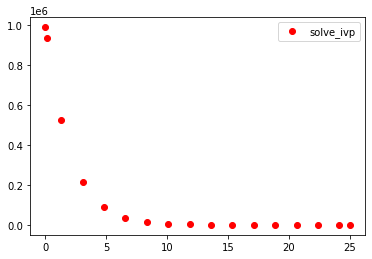

In [58]:
soln = solve_ivp(dtds, (t_0, t_f), [S])
t, y = soln.t, soln.y[0]
plt.plot(t, y, 'o', color='r', label='solve_ivp')
plt.legend()
plt.show()

In [43]:
#Решить дифференциальное уравнение (3) и построить график функции I(t)I(t)
#                                     dt/dI=αS−βI

No handles with labels found to put in legend.


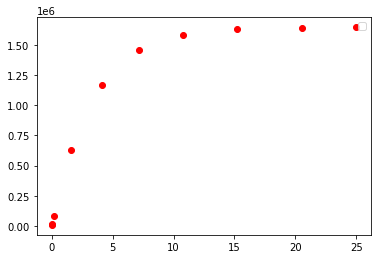

In [59]:
def dtdI(t,I):
    return (α*S)-(β*I)
soln2 = solve_ivp(dtdI, (t_0, t_f), [I])
t, y = soln2.t, soln2.y[0]
plt.plot(t, y, 'o', color='r')
plt.legend()
plt.show()

In [45]:
# Используя решения уравнений (2) и (3), с помощью уравнения (1), найти решение уравнения (4) 
# (используйте интерполяцию interp1d) и построить график функции R(t)
#dR/dt = βI
#S(t)+I(t)+R(t)=N


No handles with labels found to put in legend.


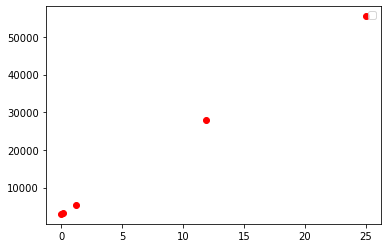

In [60]:
def dtdr(t,R):
    return β*I
soln3 = solve_ivp(dtdr, (t_0, t_f), [R])
t, y = soln3.t, soln3.y[0]
plt.plot(t, y, 'o', color='r')
plt.legend()
plt.show()



In [52]:
f=interpolate.interp1d(R, kind="cubic")

TypeError: object of type 'int' has no len()